# ***Exploratiory Data Analysis***

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Collaborating Google Collab with drive
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Importing dataset

BfData = pd.read_csv('gdrive/My Drive/BlackFridayDataset.csv')

In [ ]:
# Importing dataset
#BfData = pd.read_csv('BlackFridayDataset.csv')

In [ ]:
# Preview training dataset
BfData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Features Data Type
BfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
# Statistical summary
BfData.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,537577.0,1.002992e+06,1714.392695,1000001.0,1001495.0,1003031.0,1004417.0,1006040.0
Occupation,537577.0,8.082710e+00,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,4.087973e-01,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546e+00,3.750701,1.0,1.0,5.0,8.0,18.0
Product_Category_2,370591.0,9.842144e+00,5.087259,2.0,5.0,9.0,15.0,18.0
Product_Category_3,164278.0,1.266984e+01,4.124341,3.0,9.0,14.0,16.0,18.0
Purchase,537577.0,9.333860e+03,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


In [ ]:
# Checking for Null values
round((BfData.isnull().sum() / BfData.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.06 %
Product_Category_3            69.44 %
Purchase                        0.0 %
dtype: object

In [ ]:
# Checking the counts of unique values
round((BfData['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.94 %
36-45     20.0 %
18-25    18.16 %
46-50     8.28 %
51-55      7.0 %
55+       3.89 %
0-17      2.74 %
Name: Age, dtype: object

In [ ]:
# Checking the counts of unique values
round((BfData['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.19 %
2      18.5 %
3     17.36 %
4+    15.42 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

Exploratory Analysis on the Dataset


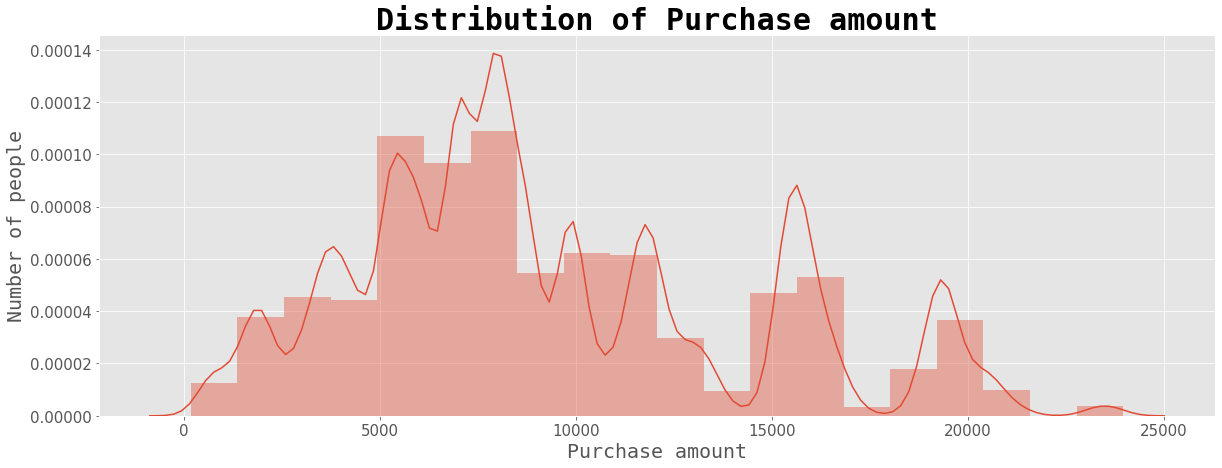

In [ ]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(BfData['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

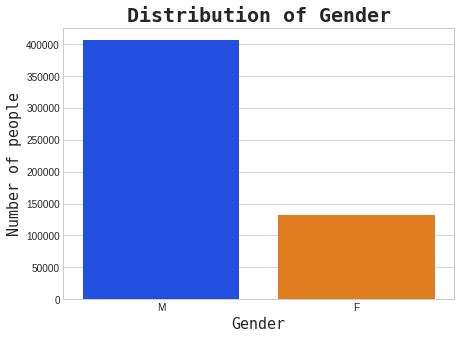

In [ ]:
# Creating a barplot for 'Gender'
gen = BfData['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

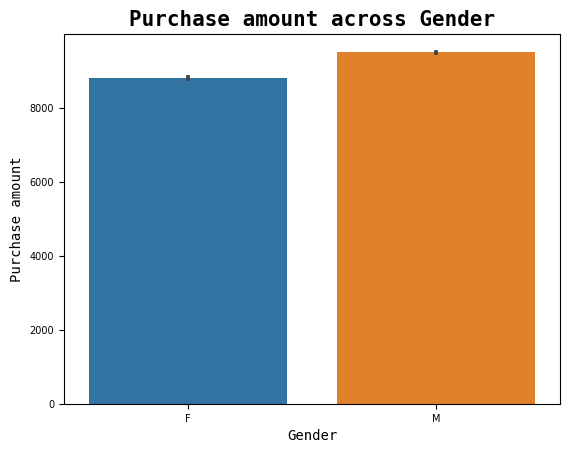

In [ ]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(BfData['Gender'], BfData['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

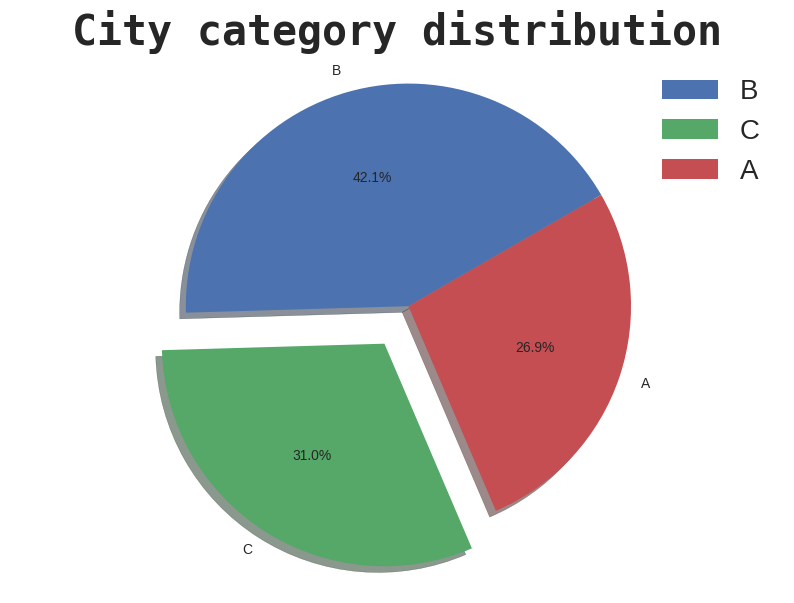

In [ ]:
# Creating a pie chart for 'City Category'
city = BfData['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

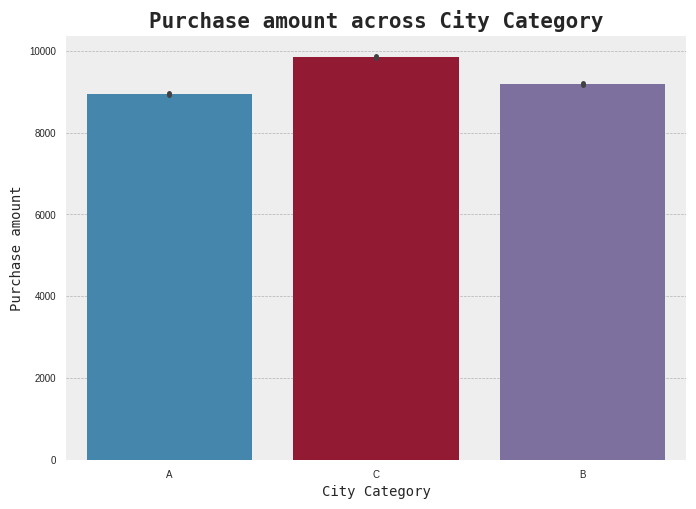

In [ ]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(BfData['City_Category'], BfData['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

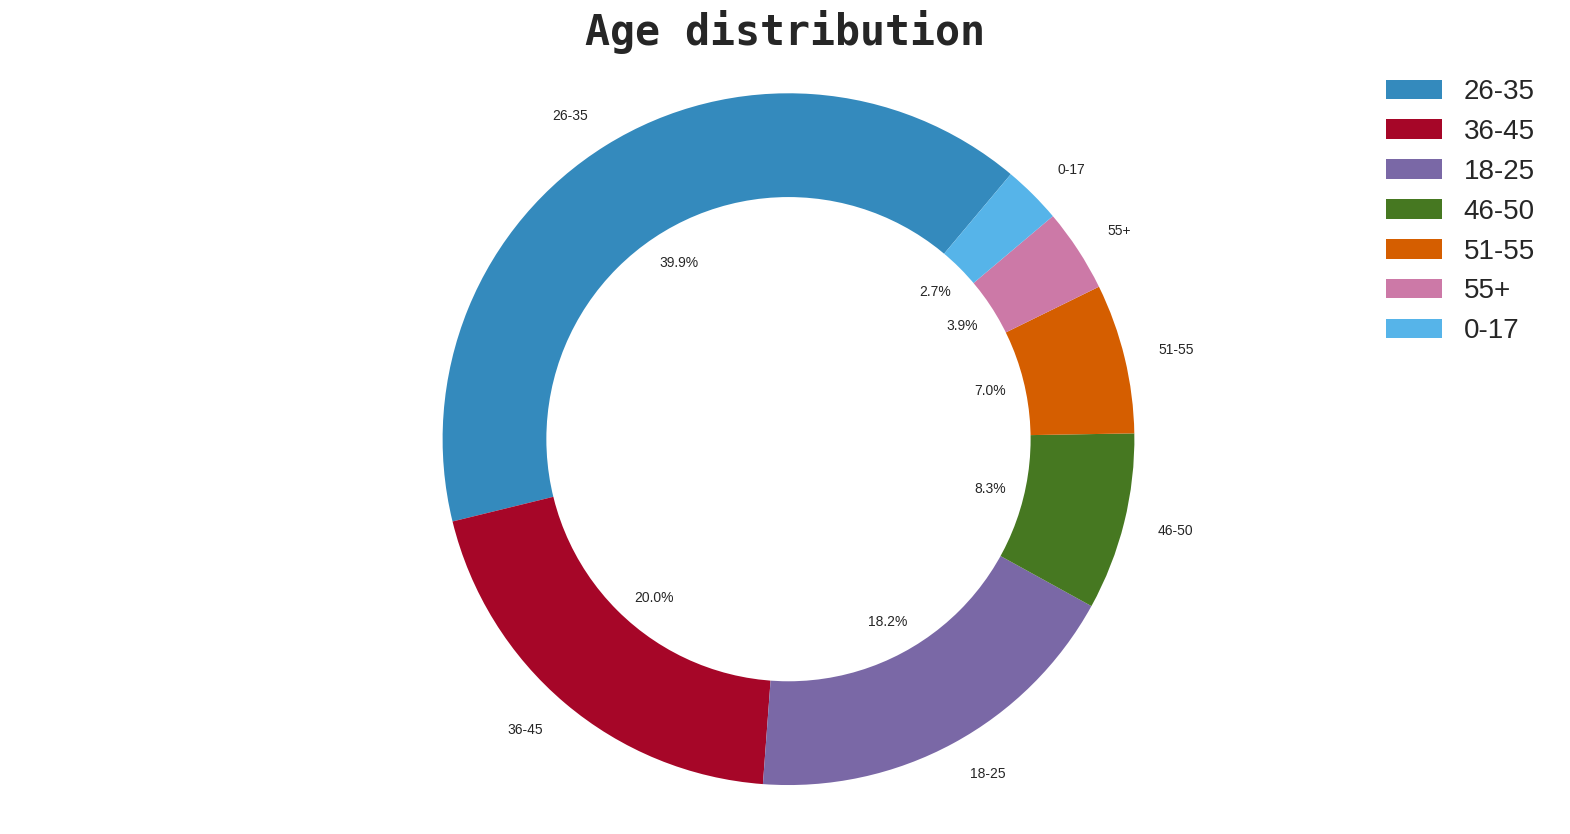

In [ ]:
# Creating a donut chart for 'Age'
age = BfData['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

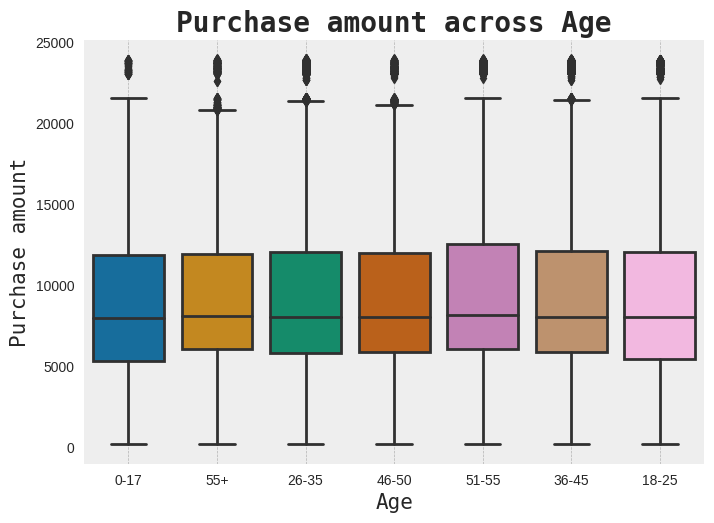

In [ ]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(BfData['Age'], BfData['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

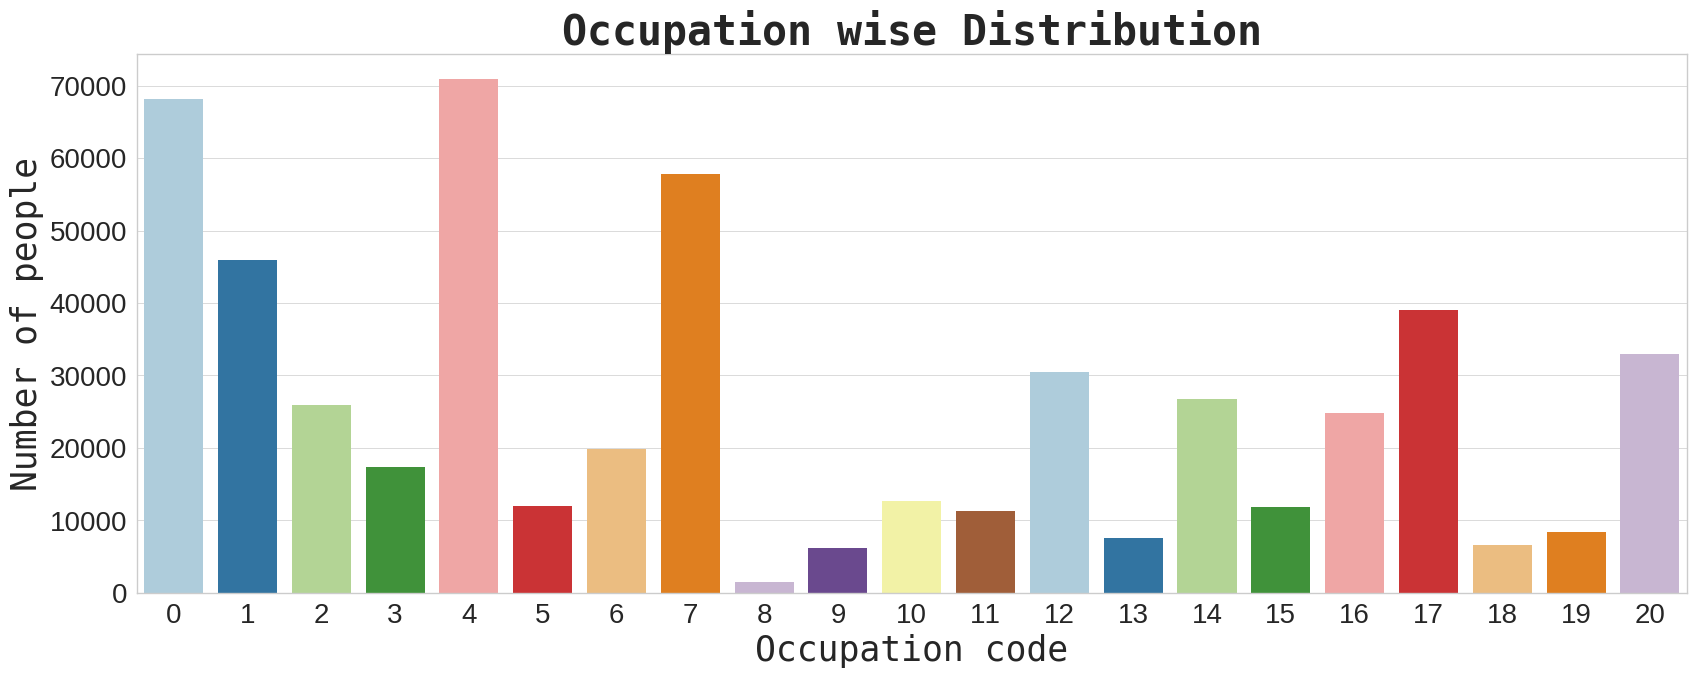

In [ ]:
# Creating a barplot for 'Occupation'
occupation = BfData['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

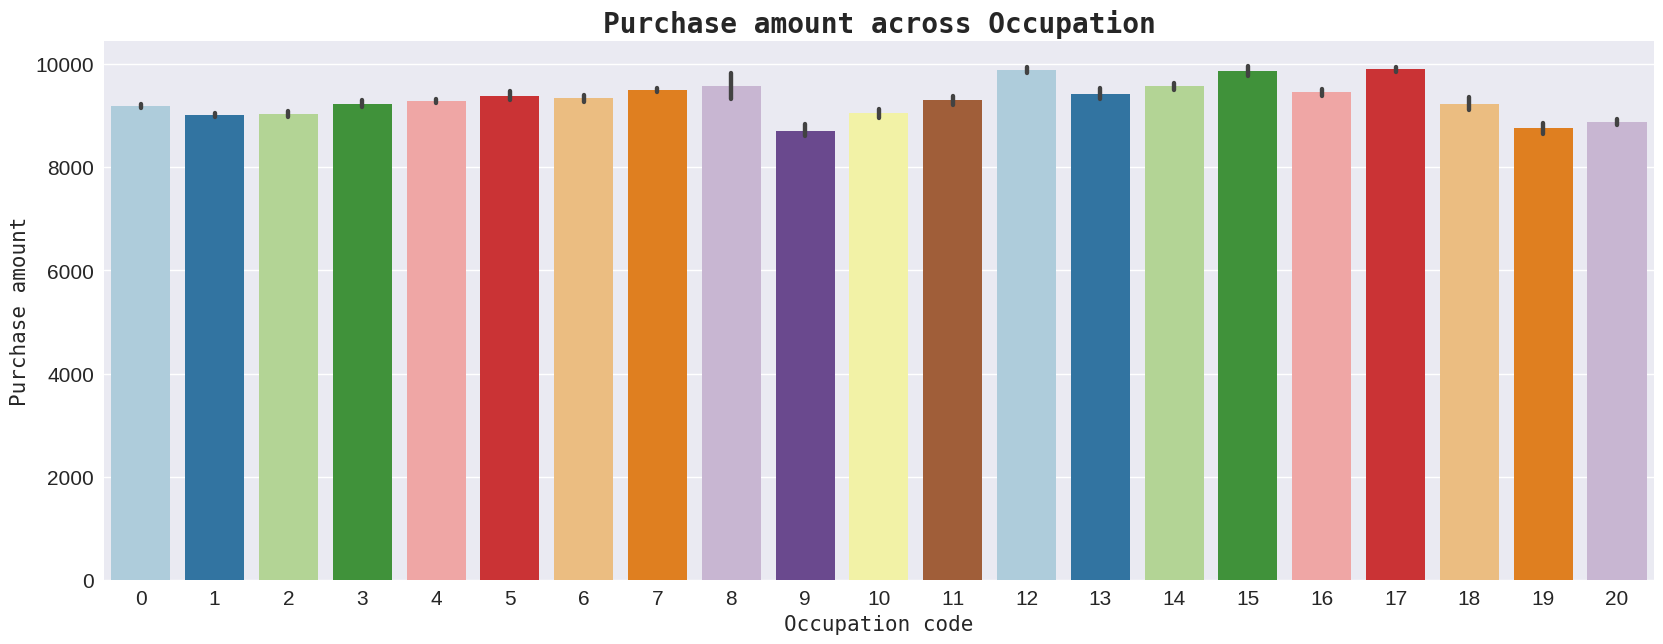

In [ ]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(BfData['Occupation'], BfData['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

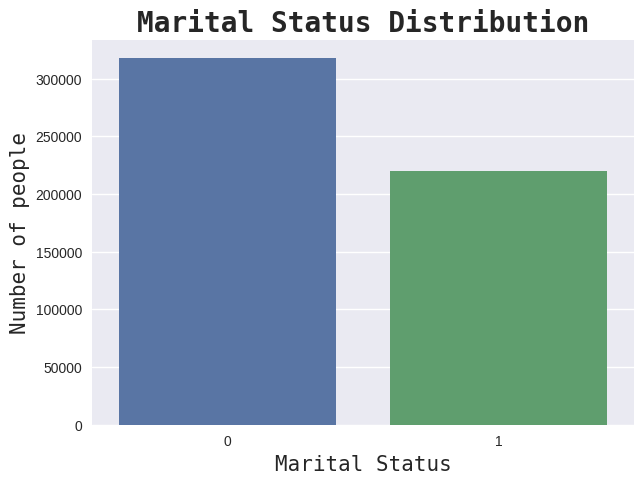

In [ ]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(BfData['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

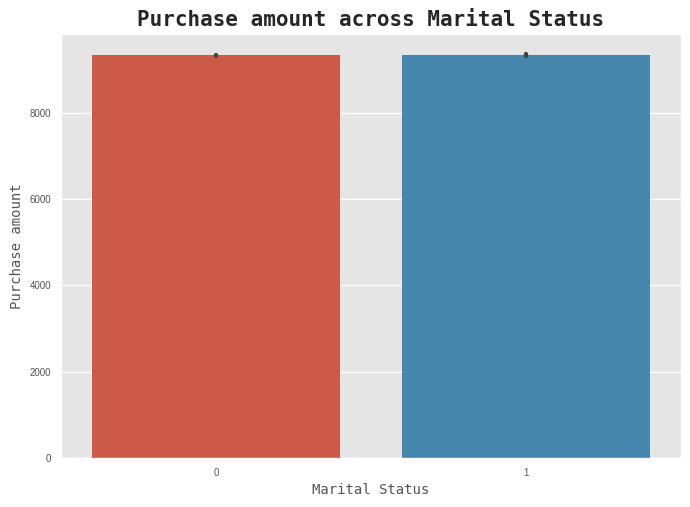

In [ ]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(BfData['Marital_Status'], BfData['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

In [ ]:
#To install a new library that is required for the Data Visualisation 
!pip install "squarify"

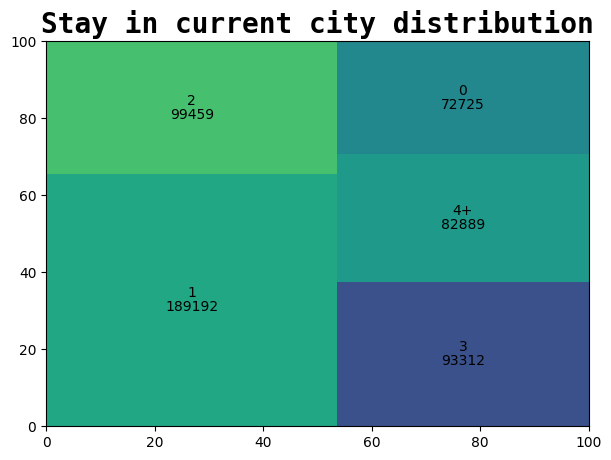

In [ ]:
# Creating a Treemap for 'Stay_In_Current_City_Years'
#pip install squarify 
stay = BfData['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

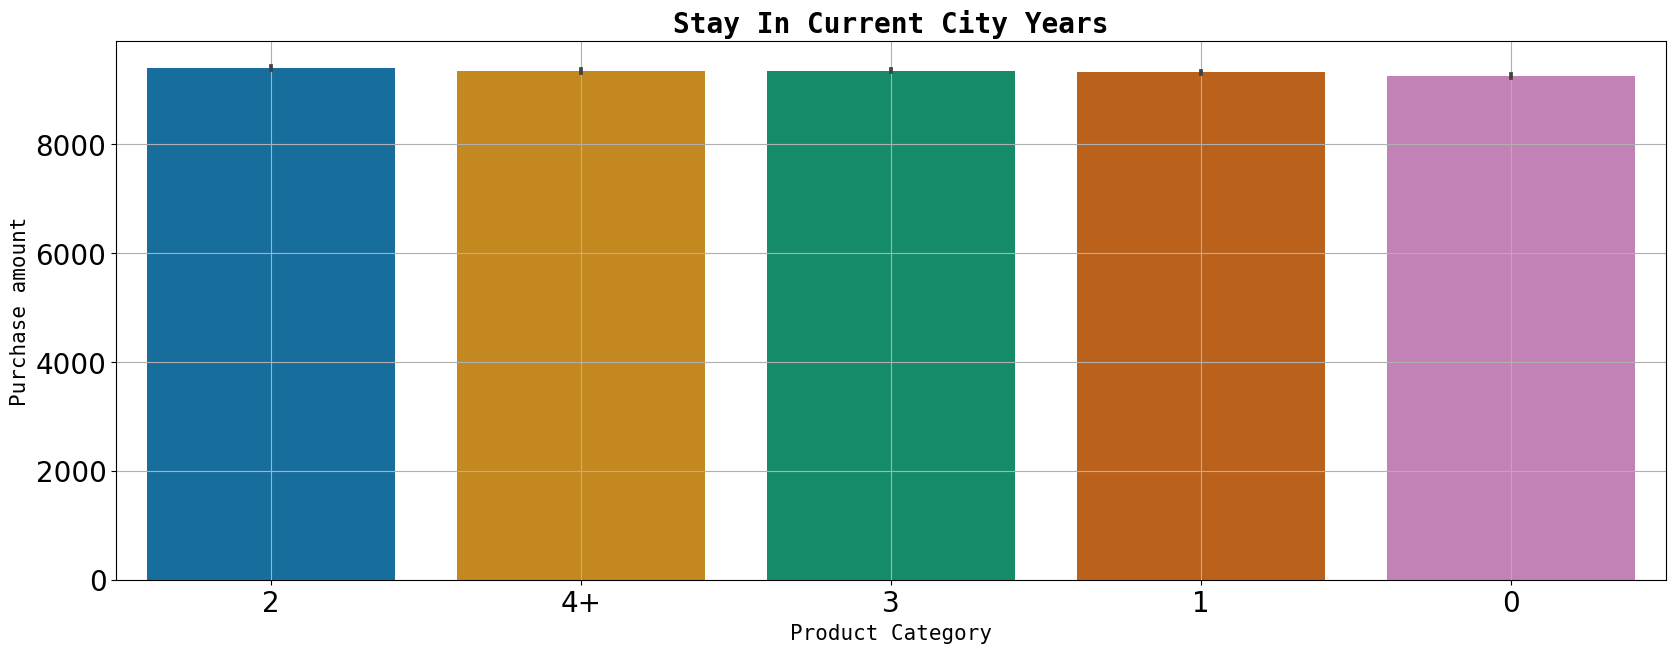

In [ ]:
# Creating a barplot of 'Stay_In_Current_City_Years vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(BfData['Stay_In_Current_City_Years'], BfData['Purchase'], palette = 'colorblind')
plt.title('Stay In Current City Years', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

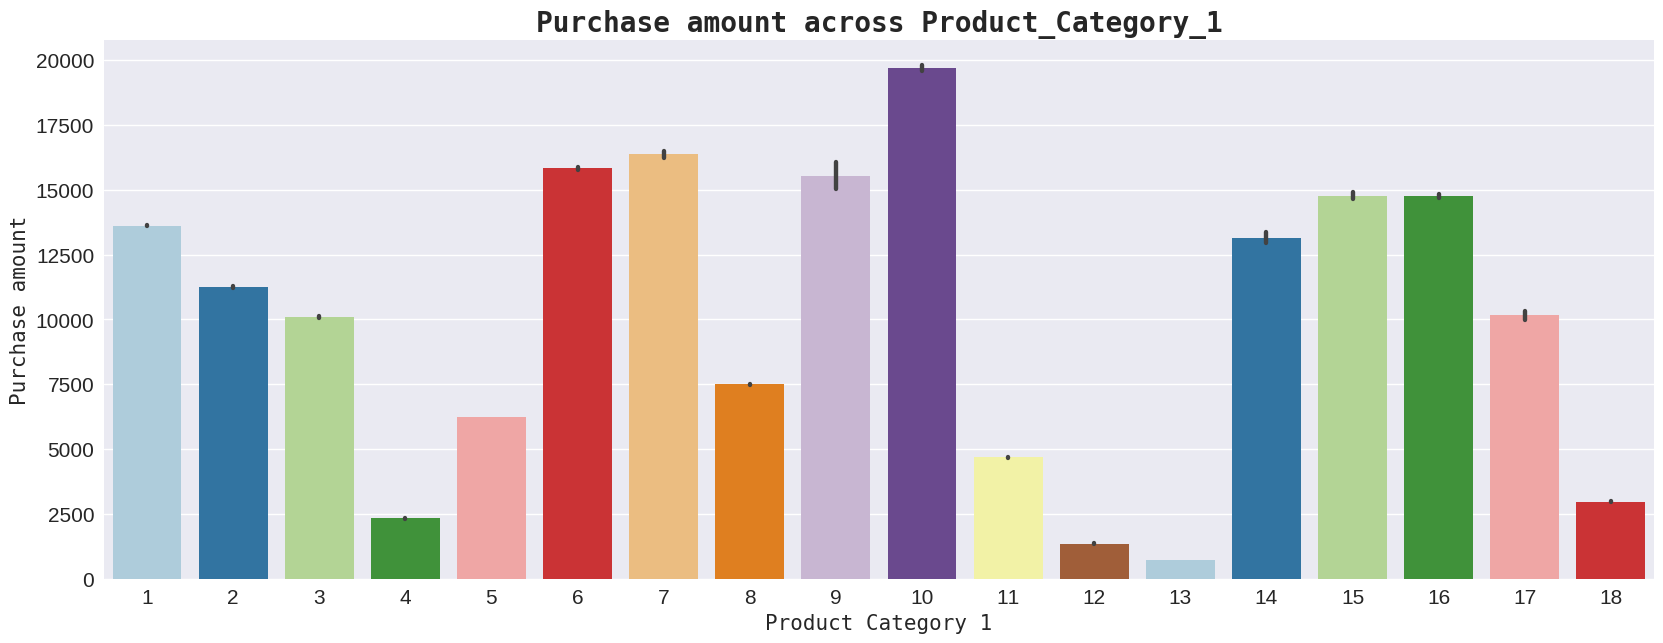

In [ ]:
# Creating a barplot of 'Product category 1 vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(BfData['Product_Category_1'], BfData['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Product_Category_1', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category 1', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

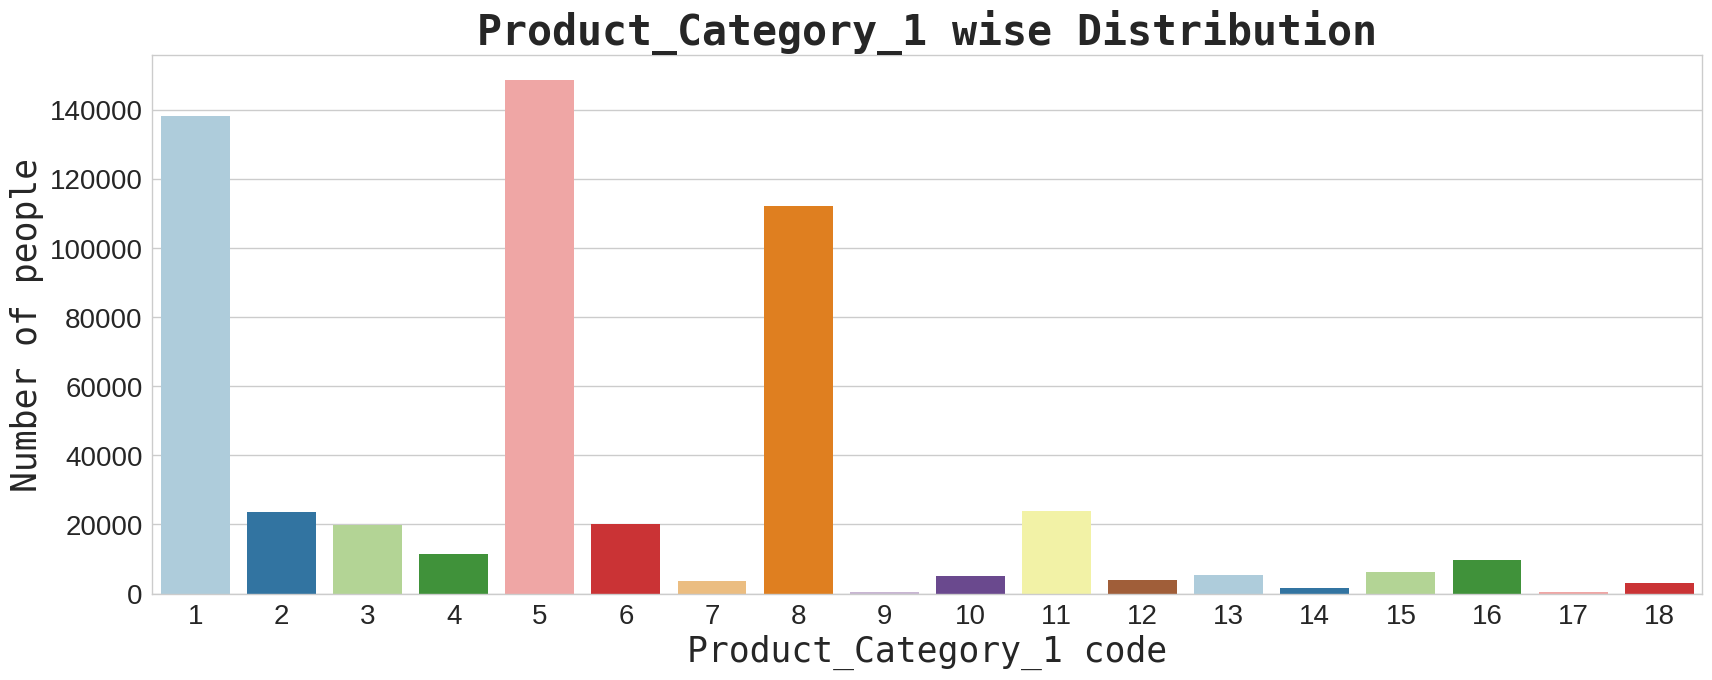

In [ ]:
# Creating a barplot for 'Product_Category_1'
Product_Category_1 = BfData['Product_Category_1'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(Product_Category_1.index, Product_Category_1.values, palette = 'Paired')
plt.title('Product_Category_1 wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Product_Category_1 code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()